In [1]:
import pandas as pd
import quandl
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
import datetime, matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [2]:
df = quandl.get('WIKI/GOOGL')

In [3]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [4]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [5]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close']*100

In [6]:
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open']*100

In [7]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

In [8]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [9]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)
forecast_out = int(math.ceil(0.01*len(df)))

In [10]:
df['Labels'] = df[forecast_col].shift(-forecast_out)

In [11]:
x = np.array(df.drop(['Labels'], 1))
x = preprocessing.scale(x)
x = x[:-forecast_out]
x_lately = x[-forecast_out:]

In [12]:
df.dropna(inplace=True)
y = np.array(df['Labels'])

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [14]:
#classifier = LinearRegression()
#classifier.fit(x_train, y_train)
#with open('linearRegression.pickle', 'wb') as f:
#    pickle.dump(classifier, f)

pickle_read = open('linearRegression.pickle', 'rb')
classifier = pickle.load(pickle_read)
accuracy = classifier.score(x_test, y_test)

In [15]:
forecast_set = classifier.predict(x_lately)
forecast_set, accuracy, forecast_out

(array([1076.89775482, 1091.23282814, 1105.16373197, 1099.48657165,
        1092.9837784 , 1090.43425411, 1088.74613014, 1085.63749993,
        1079.67520331, 1075.38612429, 1072.94768921, 1093.42581568,
        1111.7946034 , 1115.60229052, 1130.50779419, 1134.47910212,
        1132.72664333, 1130.46876327, 1132.09560342, 1151.29415466,
        1150.26109308, 1159.61008761, 1156.21245832, 1164.09176194,
        1185.25956595, 1196.85759863, 1191.19843007, 1202.95435964,
        1208.20780544, 1207.03382276, 1197.77478778, 1202.83532077,
        1201.86592975, 1137.13757401, 1085.67857496]), 0.9798305460211956, 35)

In [16]:
style.use('ggplot')

In [17]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

Text(0, 0.5, 'Price')

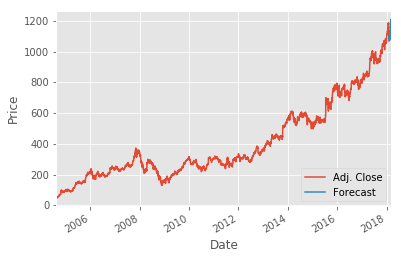

In [18]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')